# Starting with Neural Networks: Basic Classication

### Building a simple Feed-Forward Neural Networks with tensorflow

In [92]:
try :
 # % tensorflow_version only exists in Colab .
 % tensorflow_version 2.x
except Exception :
 pass

Importation of the libraries

In [93]:
# TensorFlow and tf. keras
import tensorflow as tf
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib . pyplot as plt

In [94]:
print(tf.__version__)

2.4.0


We will use the cifra10 dataset from keras

In [95]:
data=keras.datasets.cifar10
cifar10_data=data.load_data()

In [7]:
type(cifar10_data)

tuple

The type is a tuple because a tuple is an immutable list.

In [8]:
len(cifar10_data)

2

In [19]:
type(cifar10_data[1][0])

numpy.ndarray

Creation of train and test sets of 

In [96]:
( train_images , train_labels ) ,( test_images , test_labels )=cifar10_data

In [12]:
print(train_images[0].shape)

(32, 32, 3)


In [28]:
print(train_labels)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


The images are 32x32 Numpy arrays with pixel values ranging from 0 to 255

Labelisation : the labels are currently number between 0 and 9. Thanks to the info on the web site ( https://www.cs.toronto.edu/~kriz/cifar.html) we can look at the classes names and store them: 

In [13]:
class_names = [ 'airplane ' , 'automobile ' , 'bird ' , 'cat ' , 'deer '
, 'dog ' , 'frog ' , 'horse ' , 'ship ' , 'truck ']

Exploration of the data:

In [21]:
print(train_images.shape)
print(test_images.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


We have 50 000 train images and 10 000 test images

Plotting the images

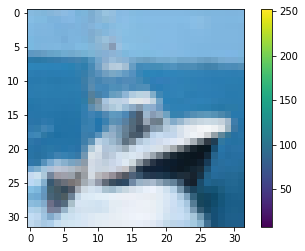

array([8], dtype=uint8)

In [31]:
index = 8
plt.figure()
plt.imshow (train_images [index])
plt.colorbar()
plt.grid(False)
plt.show()
# 
train_labels[index]

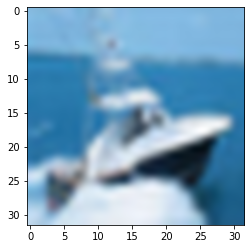

In [36]:
# To have less pixelised image
# (32x32 pixel = low quality in all cases so the image is still unclear )

plt.imshow(train_images[8],interpolation='spline36')
plt.show()




To verify that the data is in the correct format and that you're ready to
build and train the network, let's display the rst 25 images from the training
set and display the class name below each image. To do so use the following
commands:

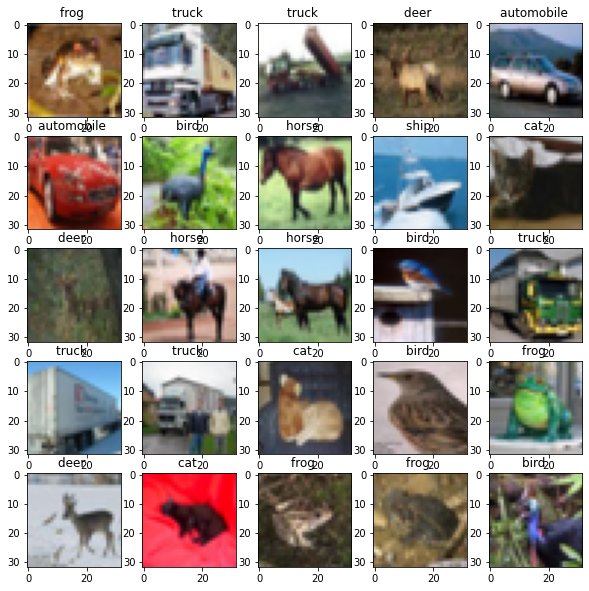

In [42]:
fig=plt.figure(figsize=(10,10))
columns=5
rows=5

for i in range(columns*rows):
  #get the image values
  image=train_images[i]
  tmp_figure=fig.add_subplot(rows, columns, i+1)
  tmp_figure.set_title(class_names[train_labels[i][0]])
  plt.imshow(image)
    
plt.show()


Normalization:

In [38]:
train_images = train_images / 255.0
test_images=test_images/255.0

### Building the neural network

Building a neural network in general requires conguring the layers of the model,
then compiling the model. The basic building block of a neural network is the
layer. Layers extract representations from the data fed into them. Hope-
fully, these representations are meaningful for the problem at hand. Most of
deep learning consists of chaining together simple layers. Most layers, such as
tf.keras.layers.Dense, have parameters that are learned during training.

First neural network denition with three layers and two activation
functions

In [40]:
model = keras.Sequential([
   keras.layers.Flatten( input_shape =(32 , 32, 3)),
   keras.layers.Dense(128 , activation ='relu'),
   keras.layers.Dense(10 , activation ='softmax')]) # 10 because we have 10 classes at the end

The first layer in this network, tf.keras.layers.Flatten, transforms the
format of the images from a two-dimensional array (of 32 by 32 pixels) to a one-
dimensional array (of 32 x 32 = 1024 pixels). Think of this layer as unstacking
rows of pixels in the image and lining them up. This layer has no parameters
to learn; it only reformats the data.
After the pixels are 
attened, the network consists of a sequence of two
tf.keras.layers.Dense layers. These are densely connected, or fully con-
nected, neural layers. The first Dense layer has 128 nodes (or neurons). The
second (and last) layer is a 10-node softmax layer that returns an array of 10
probability scores that sum to 1. Each node contains a score that indicates the
probability that the current image belongs to one of the 10 classes.
In this exercise, we don't explain the reasons of defining a neural network with
this structure. For dening a network compatible with our data, we should
define an input layer with the same size as the input data (images size) and an
output corresponding the out put data (image labels).

Before the model is ready for training, it needs a few more settings.
These are added during the model's compile step (We will explain the follow-
ing parts in details during the future sections. Use them here as an example,
because it is necessary for NN trainings):

- Loss function -> This measures how accurate the model is during training.
You want to minimize this function to "steer" the model in the right
direction.

- Optimizer -> This is how the model is updated based on the data it sees
and its loss function.

- Metrics ->Used to monitor the training and testing steps. The follow-
ing example uses accuracy, the fraction of the images that are correctly
classied.

**Training the model**

Training the neural network model requires the
following steps:

- Feed the training data to the model. In this example, the training data is
in the train images and train labels arrays.
- The model learns to associate images and labels.
- You ask the model to make predictions about a test set, in this example,
the test images array. Verify that the predictions match the labels from
the test labels array.

In [43]:
model.compile( optimizer ='adam',
  loss='sparse_categorical_crossentropy',
  metrics =[ 'accuracy'])

To start training, call the model.fit method, so called because it "fits" the model
to the training data:

In [44]:
model .fit ( train_images , train_labels , epochs =10)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0184 - accuracy: 0.2770
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7682 - accuracy: 0.3648
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7144 - accuracy: 0.3877
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6844 - accuracy: 0.3987
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6612 - accuracy: 0.4016
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6440 - accuracy: 0.4150
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6357 - accuracy: 0.4219
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6205 - accuracy: 0.4206
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6100 - accuracy: 0.4245
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.614

**Evaluate accuracy:** It is the moment for checking the model performance on the test dataset.

In [46]:
test_loss, test_acc = model.evaluate(test_images , test_labels ,
verbose =2)

313/313 - 0s - loss: 1.6531 - accuracy: 0.4192


verbose is an Integer value containing 0, 1, or 2. Verbosity mode. 0 = silent,
1 =progress bar, 2 = one line per epoch. We remind you checking the Keras
documentation for more details on any part of the code: https://keras.io/.

Here the accuracy is 0.4192 which is not that good but we only have 32x32 images so it is normal

**Make predictions:** With the model trained, we can use it to make
predictions about some images.

In [47]:
predictions = model . predict ( test_images )

Here, each prediction is an array of probability of belonging to each class, so we will have to take the highest one.

In [48]:
#for example
predictions[0]

array([0.04110932, 0.05952357, 0.12992562, 0.3823687 , 0.01194914,
       0.12414024, 0.2264269 , 0.00083737, 0.01478972, 0.00892949],
      dtype=float32)

In [51]:
# warning: argmax returns an index, here that matches with the labels but not in every case
prediction_labels=np.array([np.argmax(i) for i in predictions])

In [52]:
#comparing the results for the 3 first values
for i in range(3):
  print(prediction_labels[i]==test_labels[i])

[ True]
[False]
[ True]


Here on 3 predictions, 1 is false

Function checking the predicted labels:

In [67]:
def check_prediction(index, predictions, real_labels):
  pred=np.argmax(predictions[i])
  if np.argmax(predictions[i]) == real_labels[i]:
    print()

  else:
    print("The prediction is incorrect. Probability = "+str(np.argmax(predictions[i])))


In [68]:
check_prediction(0,predictions, test_labels)

The prediction is correct ! Probability = 8


In [80]:
def plot_pred_labels(image_index):
    # Get index of prediction using np.argmax()
    pred_index = np.argmax(predictions[image_index])
    pred_probability = np.max(predictions[image_index])
    # Get prediction from class labels array
    pred = class_names[pred_index]
    # Get actual label of test image
    actual = class_names[test_labels[image_index][0]]
    # Change color accordingly
    title_obj = plt.title(f"{pred} {pred_probability:.0%} ({actual})")
    plt.setp(title_obj, color="blue" if pred == actual else "red") 
    # Get image from training dataset
    img = test_images[image_index]
    plt.imshow(img)


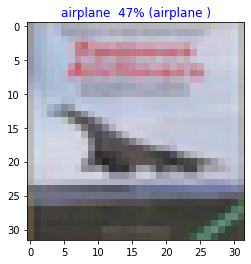

In [82]:
plot_pred_labels(3)

Grab a single element from the test set such as test images. Send
it to the model.predict() and check what will happen. Why? Correct it by
your modication. (hint: you can use expand dims())

In [70]:
pred=model.predict(test_images[3])

ValueError: ignored

Problem of dimension, we need to reshape the array of the image to predict it

In [78]:
img = test_images[1]
print(img.shape)

img = (np.expand_dims(img,0))
print(img.shape)

predicted = model.predict(img)
predicted

np.argmax(predicted)

test_labels[1]

#another alternative with reshape
img1=img.reshape((1,32,32,3))

print(model.predict(img1))


(32, 32, 3)
(1, 32, 32, 3)
[[8.8366546e-02 1.4536090e-01 7.1730395e-03 4.4694059e-03 5.3078472e-04
  3.2228311e-03 4.1940942e-04 2.4427450e-04 1.4812621e-01 6.0208660e-01]]


## Another dataset

In [83]:
data2=keras.datasets.mnist
mnist_data=data2.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [84]:
type(mnist_data)

tuple

In [85]:
len(mnist_data)

2

In [97]:
( train_images2 , train_labels2 ) ,( test_images2 , test_labels2 )=mnist_data

In [98]:
train_images2.shape

(60000, 28, 28)

In [99]:
test_images2.shape

(10000, 28, 28)

So here, the difference is in the shapes of images : 28x28 and the images are black and white

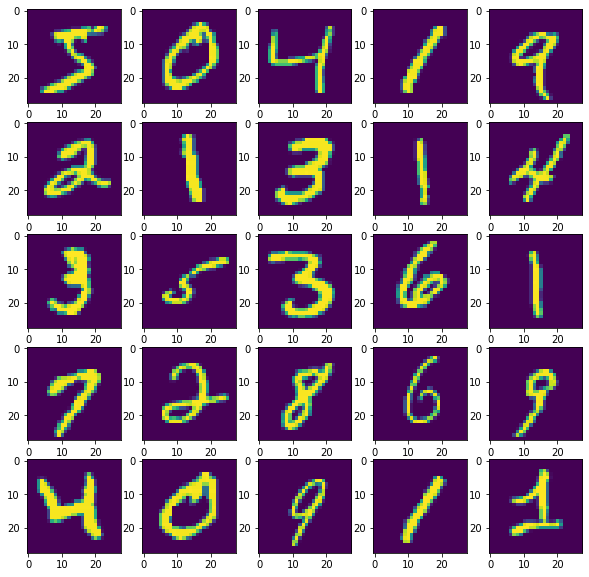

In [101]:
fig=plt.figure(figsize=(10,10))
columns=5
rows=5

for i in range(columns*rows):
  cmap=plt.cm.binary
  #get the image values
  image=train_images2[i]
  tmp_figure=fig.add_subplot(rows, columns, i+1)
  
  

  plt.imshow(image)
    
plt.show()

Building the model:

In [103]:
model2 = keras.Sequential([
   keras.layers.Flatten( input_shape =(28 , 28)),
   keras.layers.Dense(128 , activation ='relu'),
   keras.layers.Dense(10 , activation ='softmax')]) # 10 because we have 10 classes at the end

In [104]:
model2.compile( optimizer ='adam',
  loss='sparse_categorical_crossentropy',
  metrics =[ 'accuracy'])

In [107]:
model2.fit ( train_images2 , train_labels2 , epochs =10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 7.7995 - accuracy: 0.8245
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4141 - accuracy: 0.9017
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2806 - accuracy: 0.9279
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2391 - accuracy: 0.9388
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2240 - accuracy: 0.9418
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2068 - accuracy: 0.9468
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2053 - accuracy: 0.9499
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1853 - accuracy: 0.9542
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1858 - accuracy: 0.9532
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.176

In [109]:
test_loss2, test_acc2 = model2.evaluate(test_images2 , test_labels2 ,
verbose =2)

313/313 - 1s - loss: 0.2938 - accuracy: 0.9475


As the images are very simpler, the classification is much easier for the model to predict and the accuracy is much better

**Additionnal topics:**
- Dogs and cats classification : https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/